In [69]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [70]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [71]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [72]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [73]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.008460145914996013


In [74]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


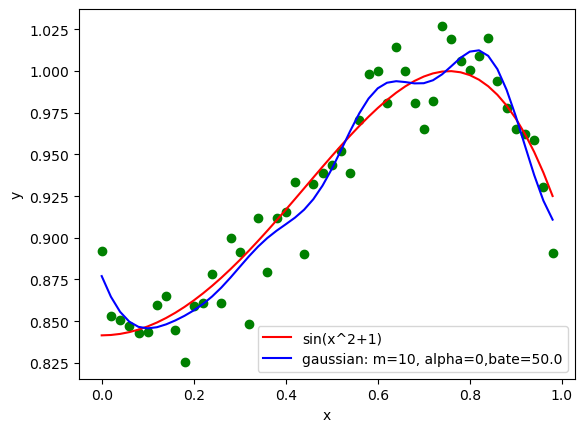

w:  [ 1.10238405 -0.53956819  0.90804305 -1.64863274  2.16104317 -2.7759021
  2.86795367 -2.57952458  1.72812026 -0.78180318]


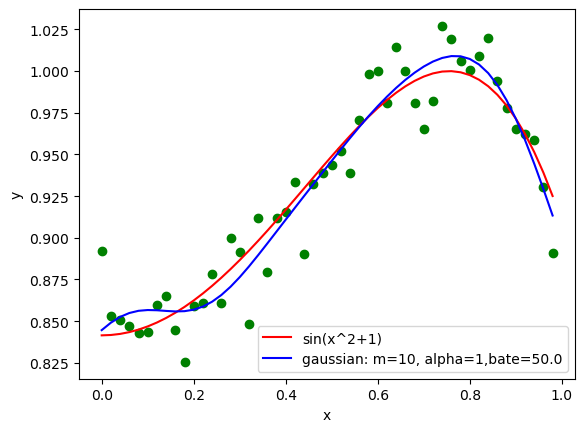

w:  [ 0.77982641  0.1167402  -0.09869832  0.09151417  0.02588685  0.01983277
  0.1028466   0.02761392  0.08341115  0.10526036]


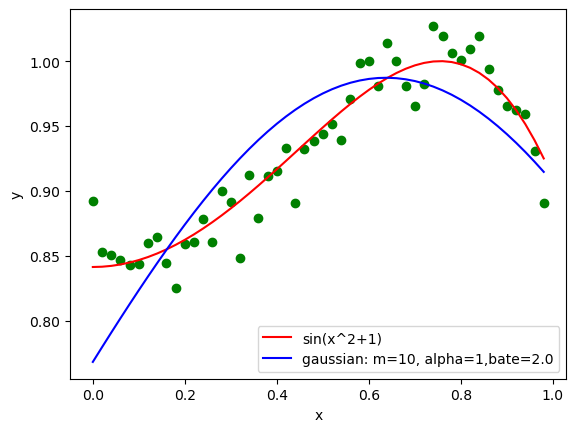

w:  [0.26063488 0.04487775 0.04144621 0.0441259  0.05346498 0.06924636
 0.09048005 0.11550493 0.14218544 0.16817256]


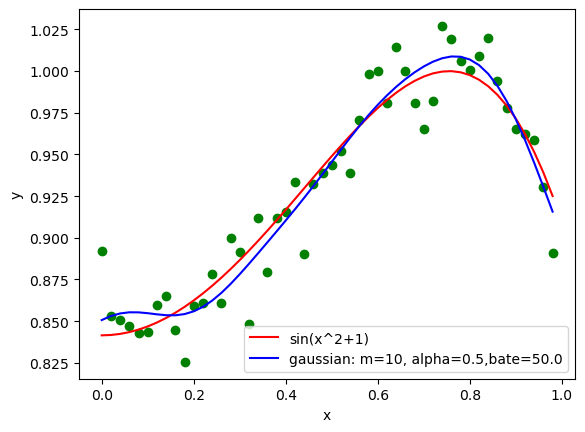

w:  [ 0.80154449  0.10651622 -0.12900577  0.13132382 -0.01577187  0.01537735
  0.12705879 -0.02361131  0.12020401  0.07100313]


In [79]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



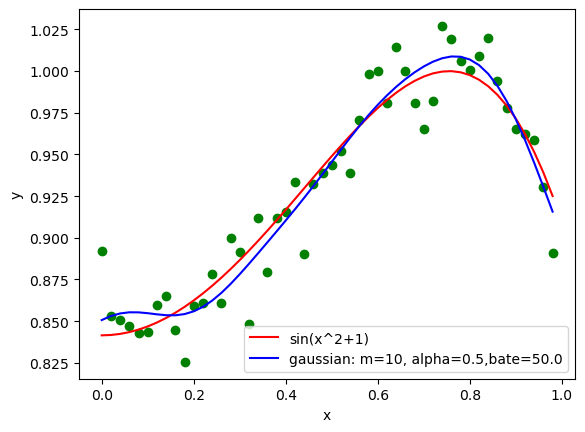

w:  [ 0.80154449  0.10651622 -0.12900577  0.13132382 -0.01577187  0.01537735
  0.12705879 -0.02361131  0.12020401  0.07100313]


In [80]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

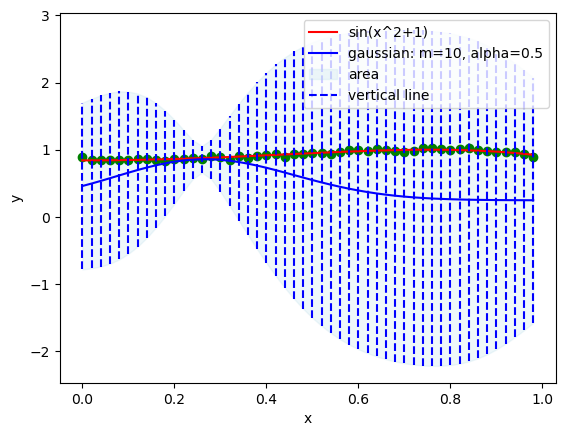

[13]
1


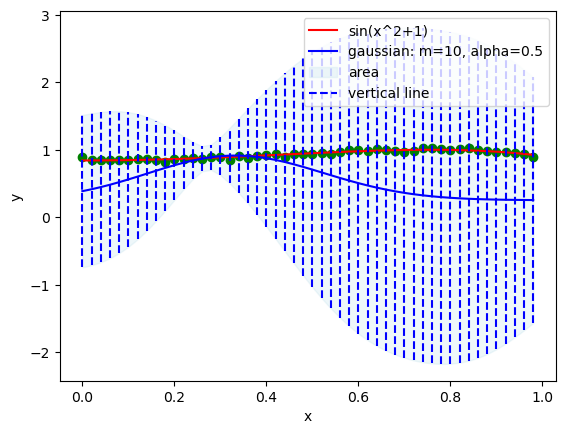

[13, 14]
2


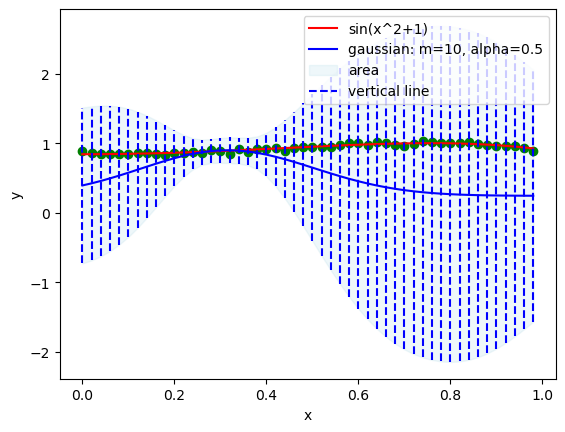

[13, 14, 18]
3


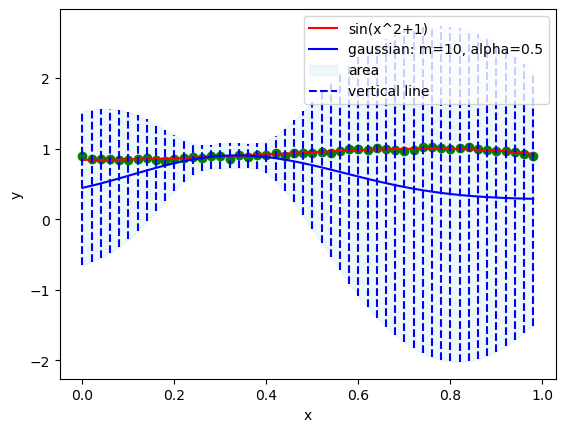

[13, 14, 18, 19]
4


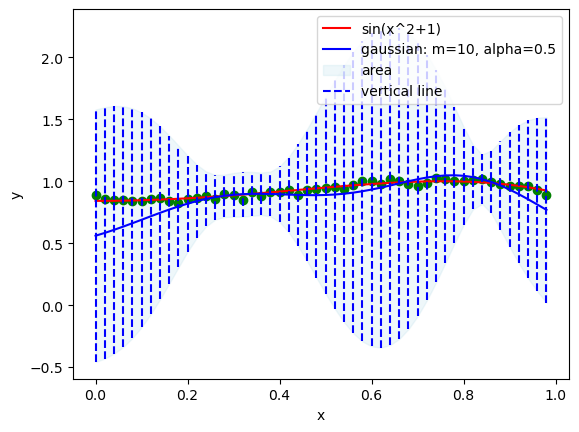

[13, 14, 18, 19, 42]
5


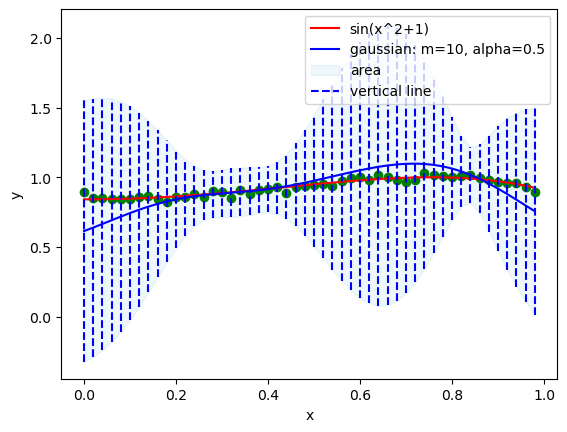

[13, 14, 18, 19, 42, 21]
6


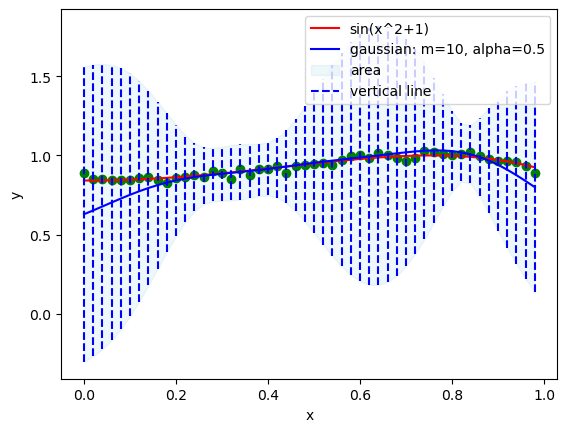

[13, 14, 18, 19, 42, 21, 41]
7


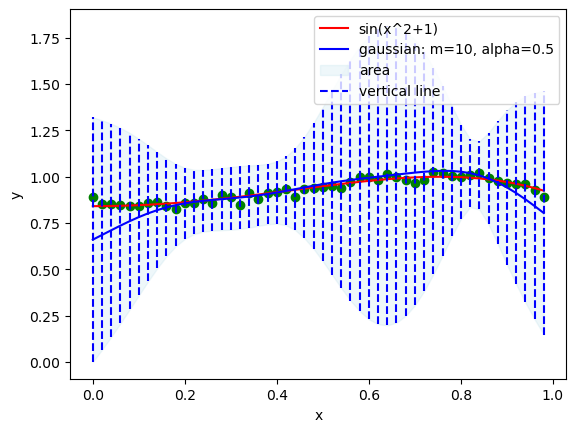

[13, 14, 18, 19, 42, 21, 41, 10]
8


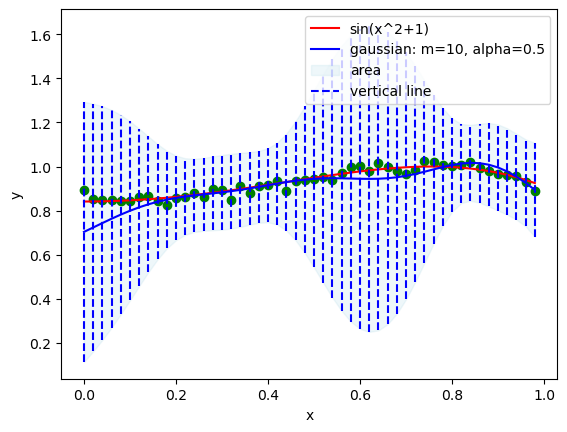

[13, 14, 18, 19, 42, 21, 41, 10, 48]
9


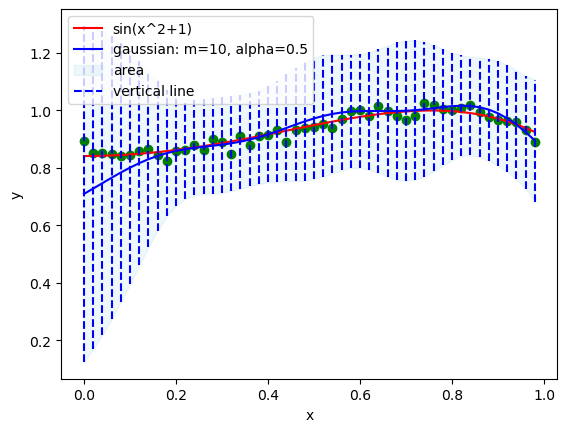

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30]
10


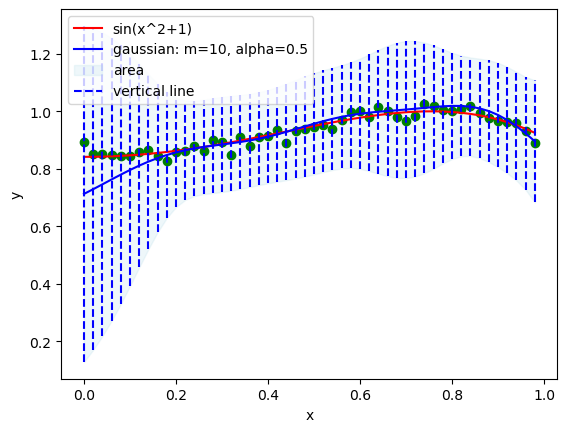

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25]
11


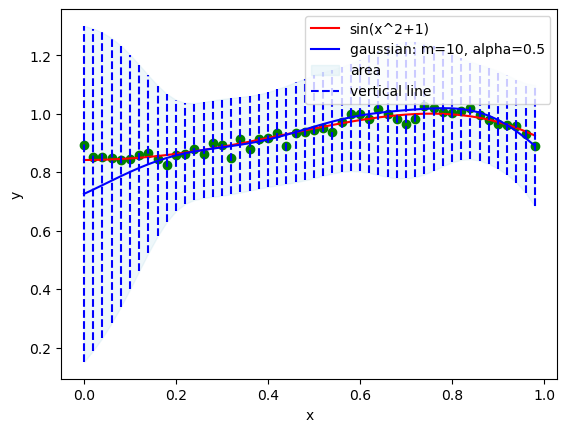

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45]
12


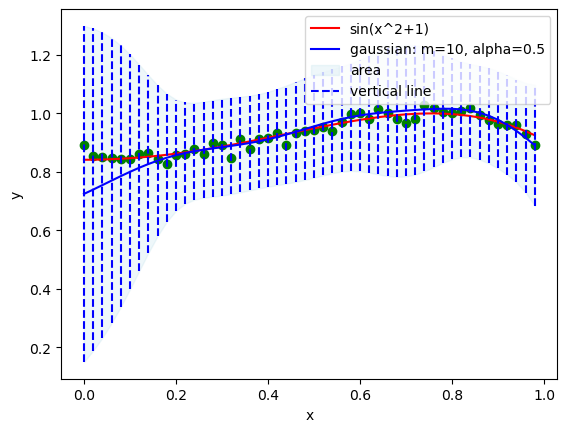

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41]
13


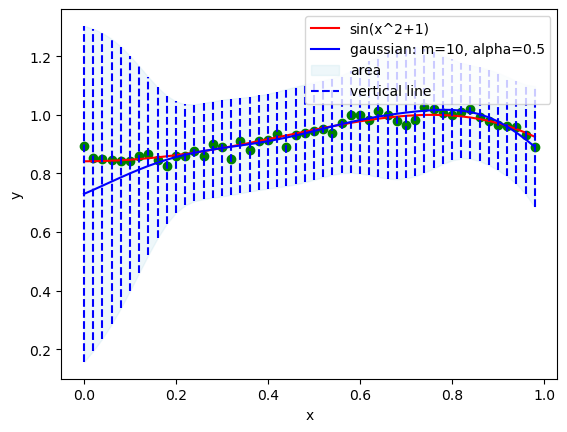

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27]
14


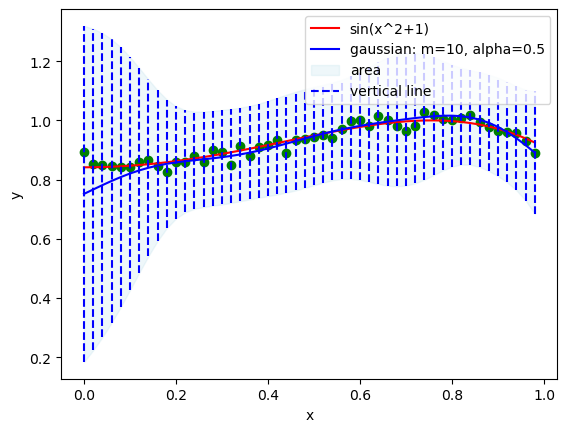

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16]
15


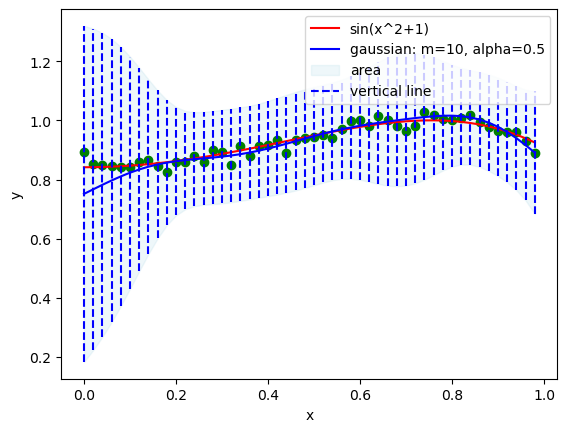

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12]
16


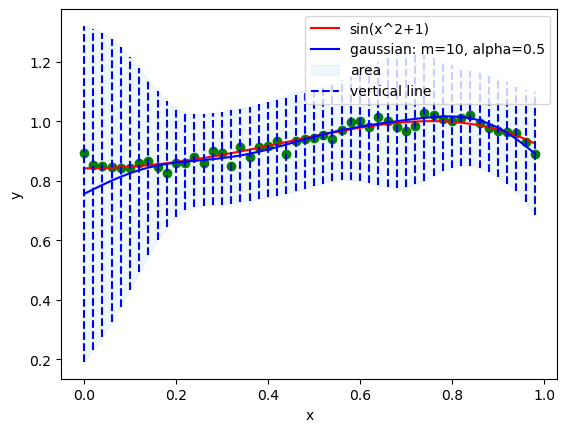

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13]
17


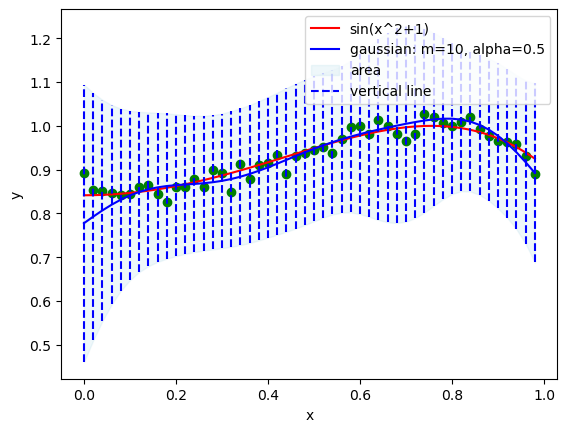

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5]
18


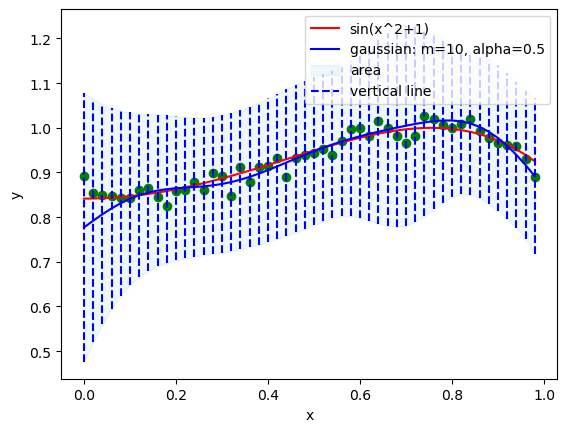

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49]
19


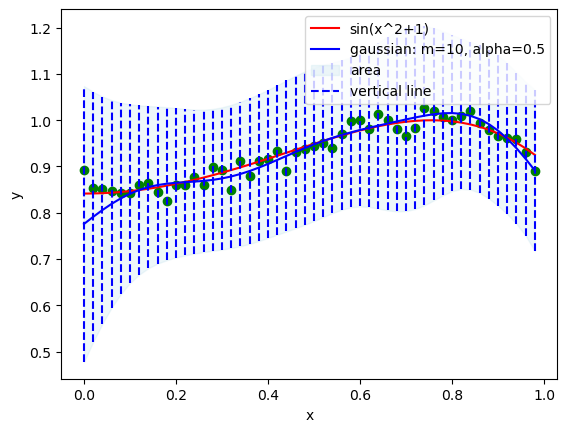

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31]
20


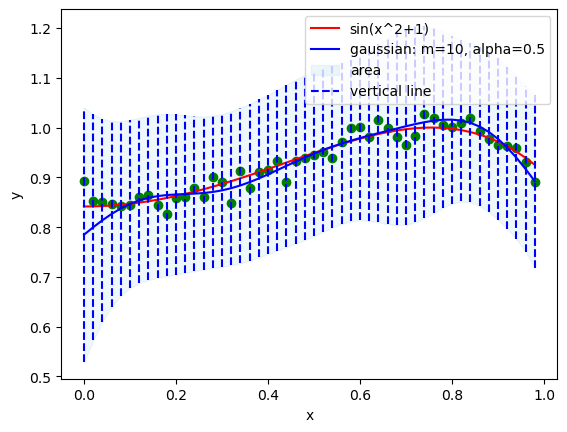

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4]
21


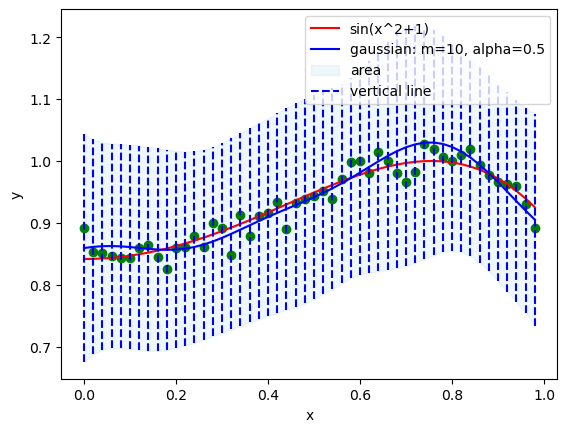

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0]
22


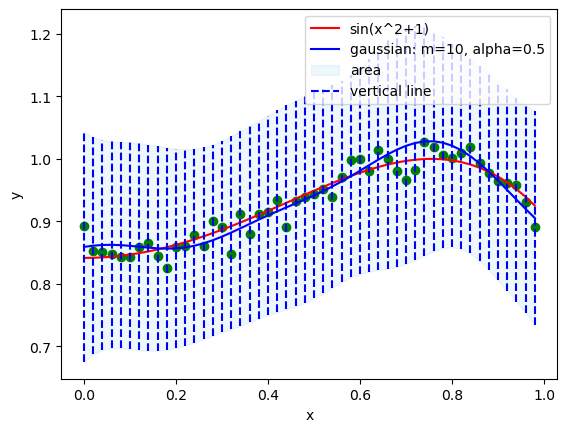

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41]
23


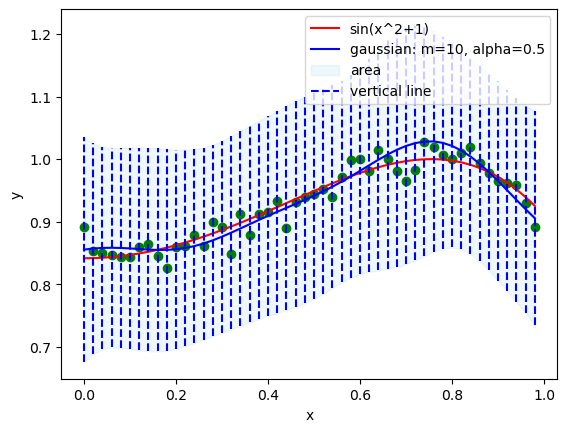

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3]
24


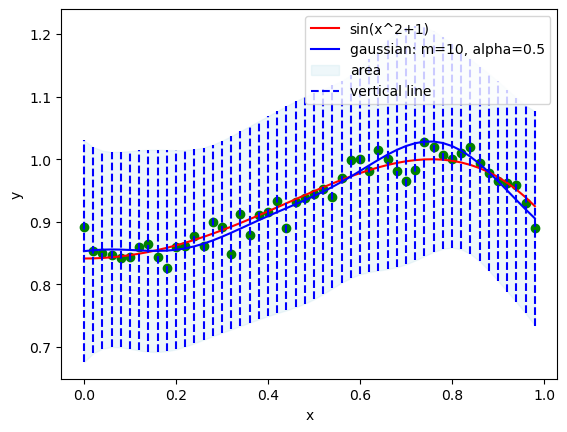

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3]
25


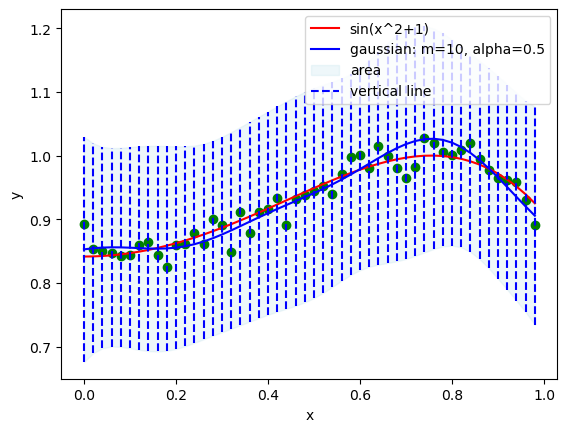

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31]
26


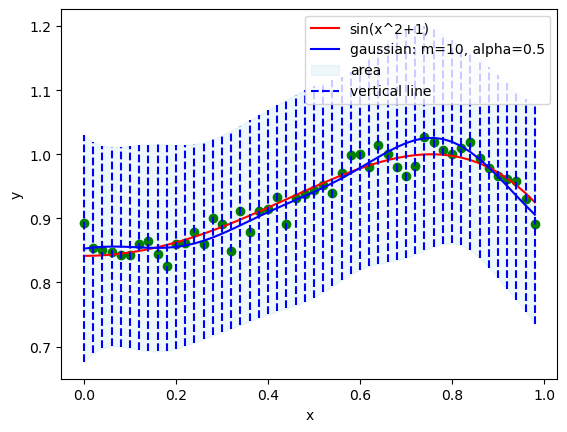

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41]
27


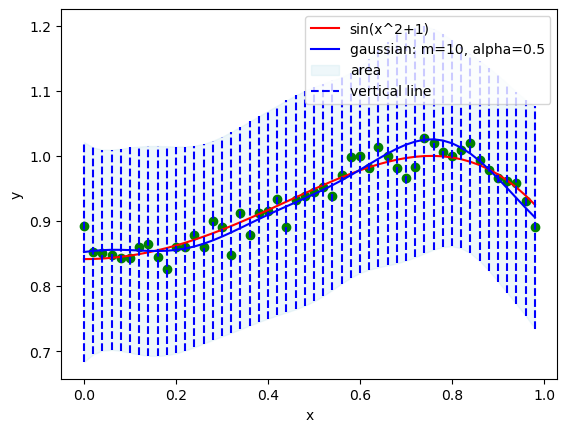

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1]
28


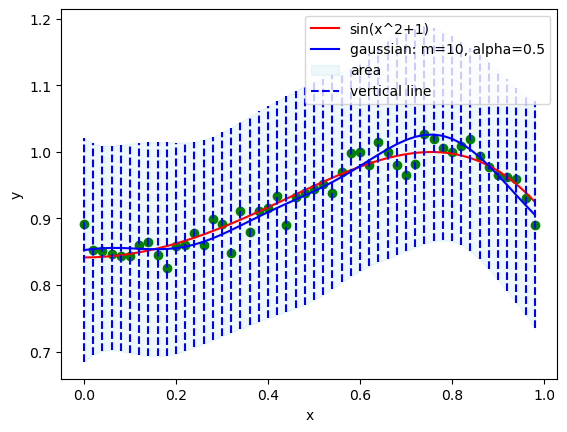

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37]
29


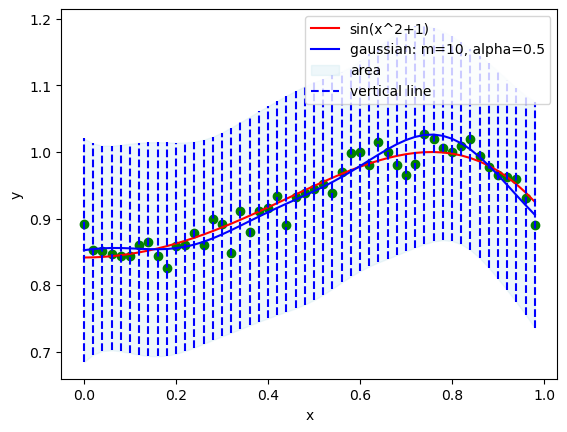

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43]
30


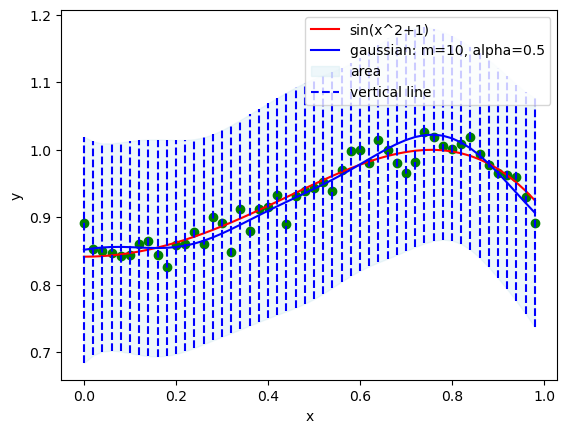

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39]
31


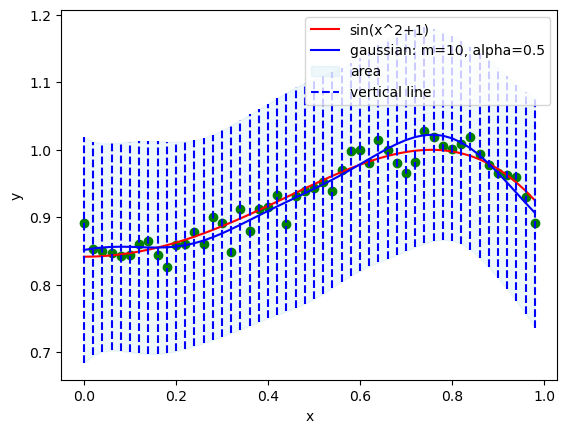

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10]
32


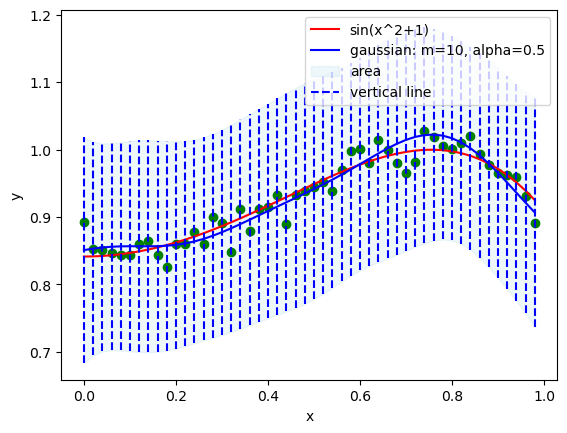

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12]
33


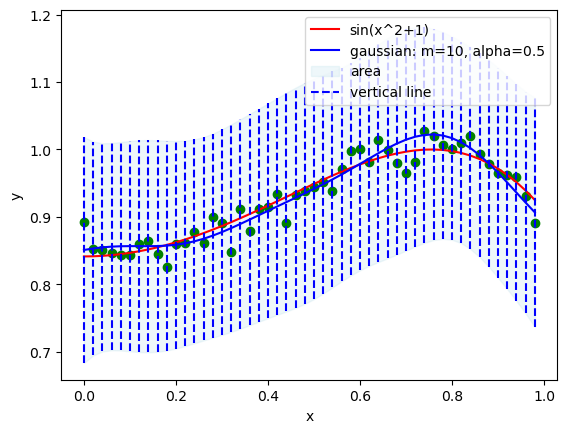

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41]
34


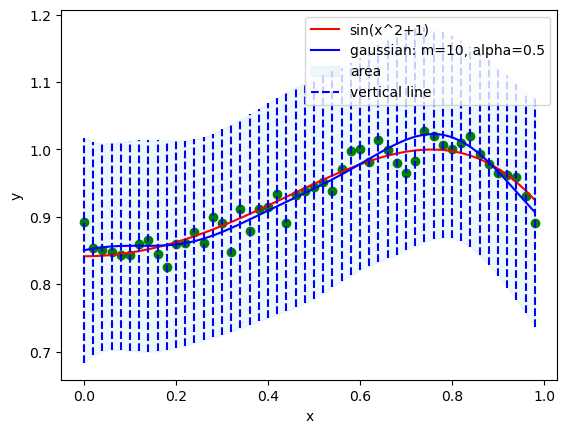

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42]
35


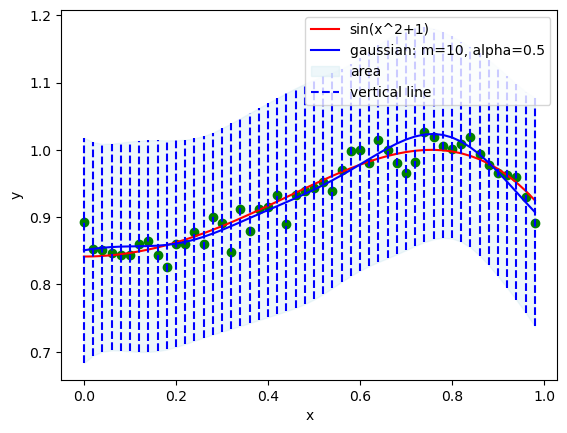

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14]
36


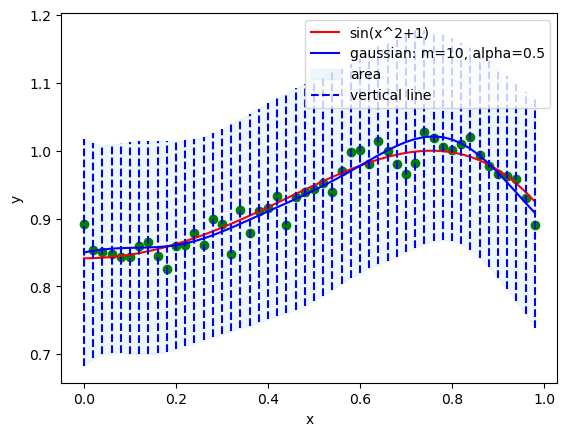

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39]
37


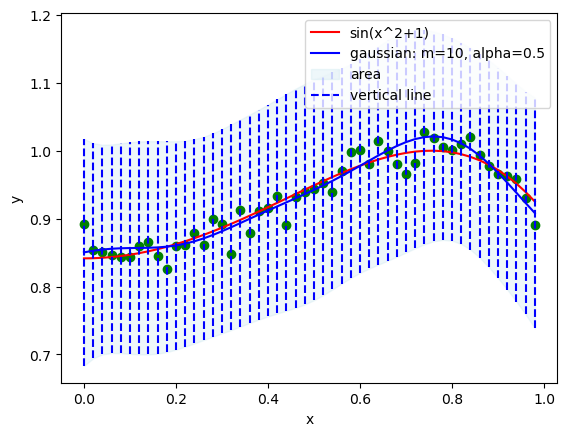

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19]
38


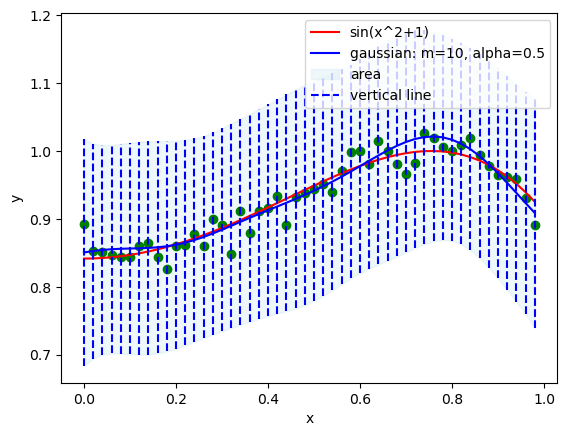

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14]
39


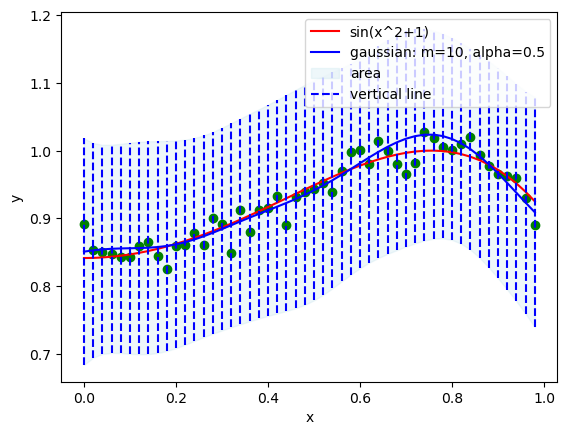

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32]
40


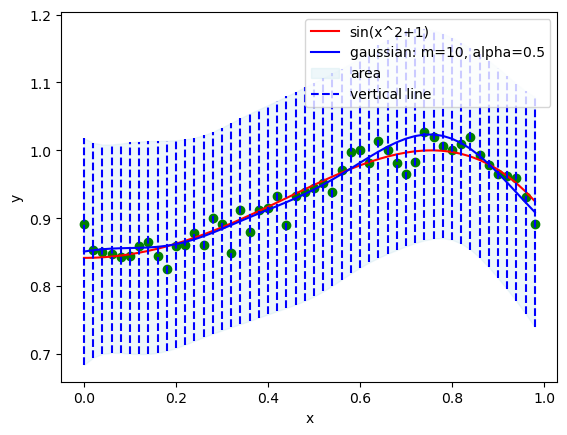

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24]
41


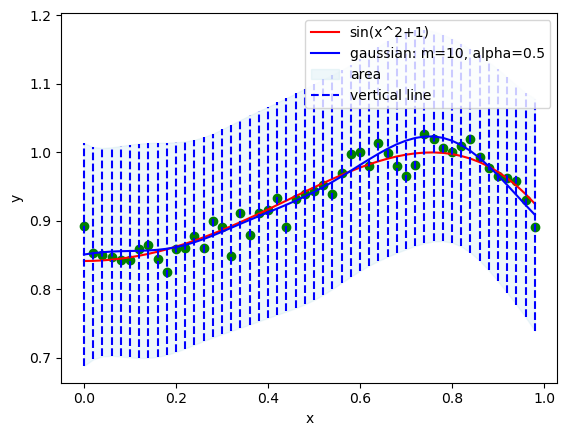

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1]
42


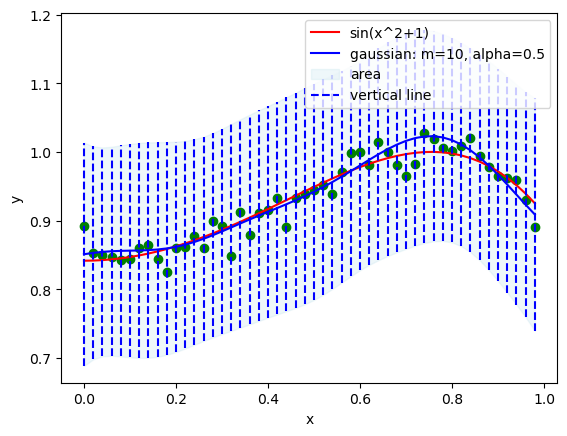

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31]
43


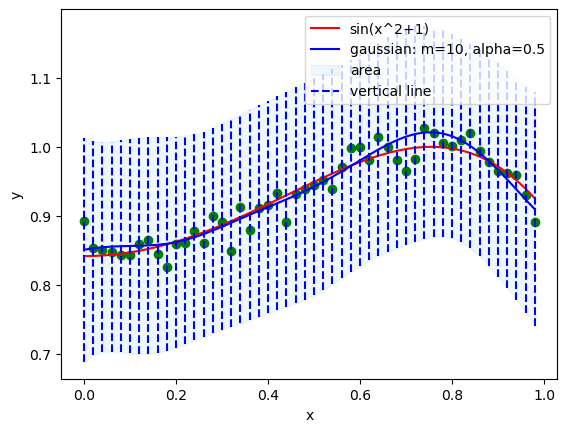

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40]
44


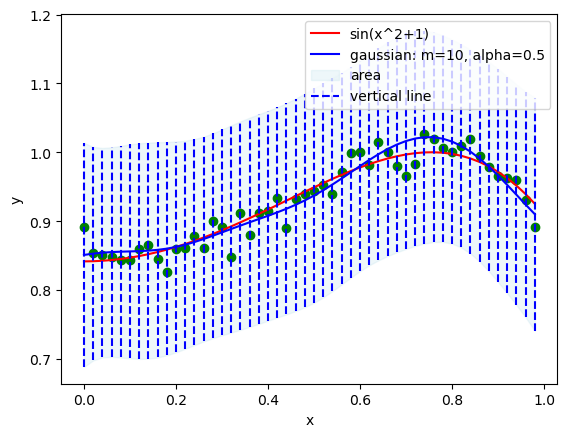

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22]
45


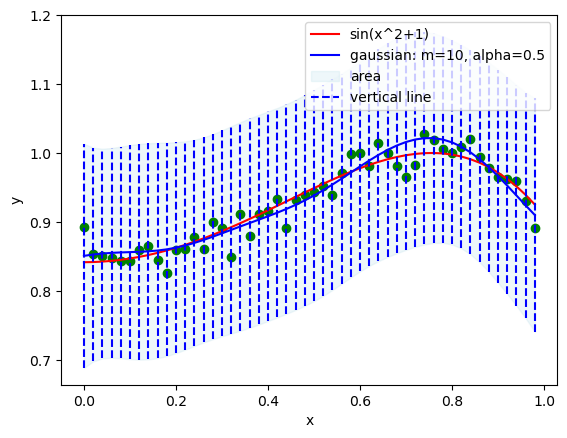

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22, 25]
46


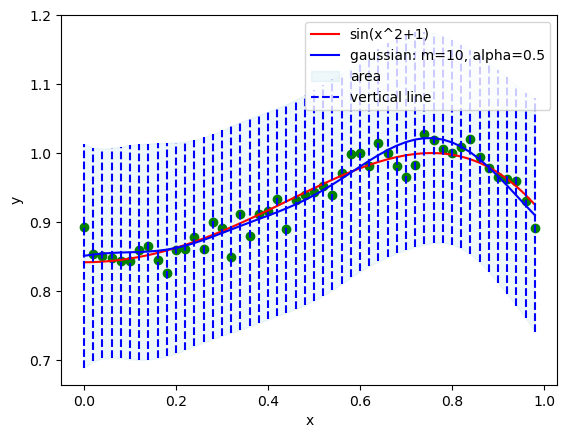

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22, 25, 20]
47


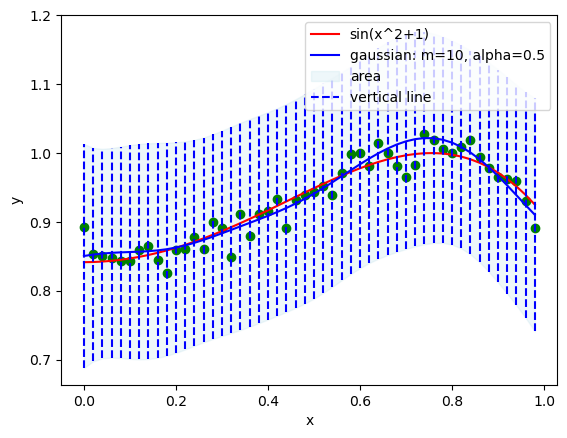

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22, 25, 20, 29]
48


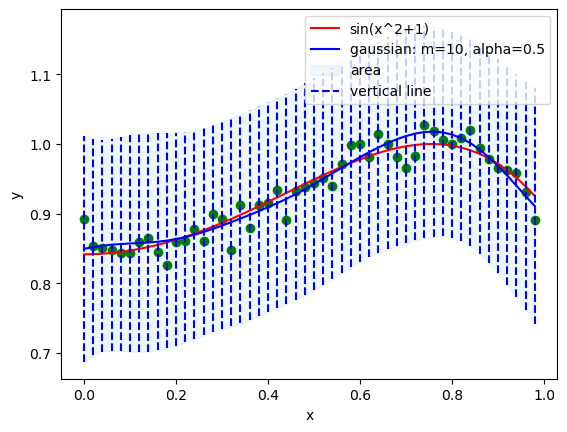

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22, 25, 20, 29, 34]
49


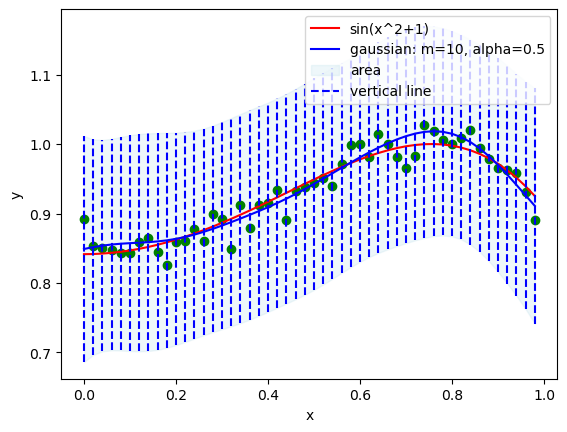

[13, 14, 18, 19, 42, 21, 41, 10, 48, 30, 25, 45, 41, 27, 16, 12, 13, 5, 49, 31, 4, 0, 41, 3, 3, 31, 41, 1, 37, 43, 39, 10, 12, 41, 42, 14, 39, 19, 14, 32, 24, 1, 31, 40, 22, 25, 20, 29, 34, 42]
50


In [81]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
